# Modeling human behavior
Vaccination and Hygiene are the most important [factors](https://www.youtube.com/watch?v=gxAaO2rsdIs) that influence the growth rate of infection. We will explore the following groups of behaviors (adapted from [this paper](https://arxiv.org/pdf/2101.07926)):
- Daily interactions
- Hygiene
- Vaccination
- Quarantine

In [15]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# model vaccination decision based on previous experience
def vaccination_decision(p_n, s, r, phi):
    """ 
    Model vaccination decision based on previous experience.
    parameters:
    - p_n: proportion of population vaccinated in year n
    - s: probability of vaccine success
    - r: vaccine morbidity rate
    - phi: fractional size of pandemic
    return: the percentage of the population that vaccinates in the next time step.
    """
    # input validation
    if not all(0 <= x <= 1 for x in [p_n, s, r, phi]):
        raise ValueError("Input values must be between 0 and 1.")
    s_pn = s * p_n # proportion of population immune to virus in year n
    f = proportion_infected(phi, s_pn)

    term1 = (f * (1 - p_n)) # non-vaccinated individuals who get sick
    term2 = (1 - r) * s * p_n # vaccinated individuals who did not get sick
    term3 = (1 - f) * (1 - r) * (1 - s) * p_n # vaccinated individuals who got sick (unsuccessful)
    
    p_next = term1 + term2 + term3
    
    return min(max(p_next, 0), 1) 


def proportion_infected(phi, s_pn):
    """
    Model the proportion of susceptible individuals that get infected during a pandemic.

    Parameters:
    phi: fractional size of pandemic (0 < phi < 1)
    s_pn: population of susceptible individuals (0 < s_pn < 1)
    """
    # Check input validity
    if not (0 < phi < 1) or not (0 < s_pn < 1):
        raise ValueError("Input values must be between 0 and 1.")

    # model equation
    try:
        f = phi / (1 - s_pn)
        return min(f, 1.0)
    except ZeroDivisionError:
        return 0 # if s_pn is 1, then no one gets infected

### Run simulation
The following sources were used:
- The vaccination rate of NYC is around [50%](https://www.nyc.gov/site/doh/about/press/pr2020/flu-vaccinations-surge-this-season.page)
- Vaccine success of Influenza B is [56.4%](https://www.cidrap.umn.edu/influenza-vaccines/flu-vaccine-estimated-be-21-effective-against-flu-spread-household-members)
- CDC surveillance data shows that 8% of the population gets infected during a flu season

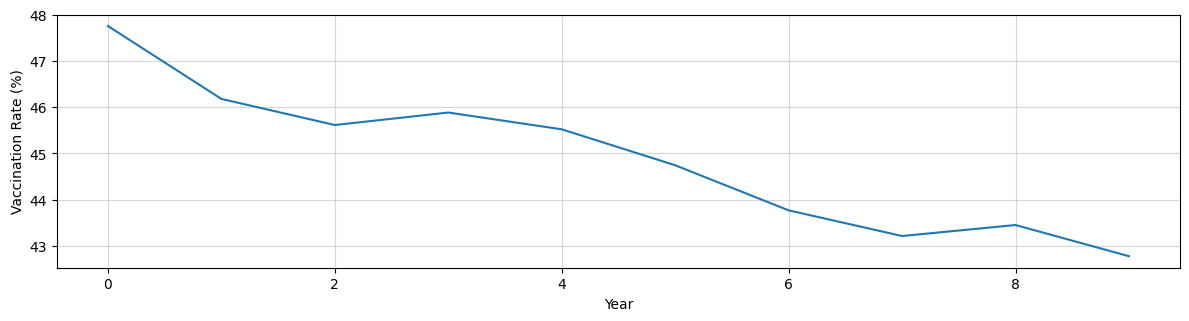

In [17]:
# run multiple simulations
def run_simulations(years, initial_p_n):
    """
    Run multiple simulations of vaccination decision over a given number of years.
    """
    p_n = initial_p_n 
    results = []

    # base parameters
    s = .564 # probability of vaccine success 
    r = .1 # vaccine morbidity rate
    phi = .08 # fractional size of pandemic

    for year in range(years):
        current_phi = phi * np.random.uniform(0.8, 1.2) # +-20% variation in epidemic size
        current_s = s * np.random.uniform(0.9, 1.1) # +-10% variation in vaccine success
        current_r = r * np.random.uniform(0.9, 1.1) # +-10% variation in vaccine morbidity rate

        p_next = vaccination_decision(p_n, current_s, current_r, current_phi)
        results.append({
            'year': year,
            'vaccination_rate': p_next*100,
            'epidemic_size': current_phi,
            'success_rate': current_s,
            'morbidity_rate': current_r
        })

        p_n = p_next

    return pd.DataFrame(results)

# run simulations
initial_p_n = .5 # start with a 50% vaccination rate
df_results = run_simulations(years=10, initial_p_n=initial_p_n)

# plot results
plt.figure(figsize=(12, 6))

# vaccination rate over time
plt.subplot(2, 1, 1)
plt.plot(df_results['year'], df_results['vaccination_rate'], label='Vaccination Rate')
plt.xlabel('Year')
plt.ylabel('Vaccination Rate (%)')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()



